<a href="https://colab.research.google.com/github/gustavor10silva/materiais_cidamo/blob/main/CiDAMO_Clusteriza%C3%A7%C3%A3o_T%C3%B3pico_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tópico 5 - Clusterização

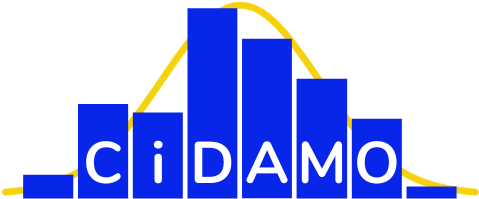

## 1 Introdução

### 1.1 Aprendizado supervisionado x Aprendizado não supervisionado

Quando trabalhamos com aprendizagem de máquina, é essencial entendermos que existem dois tipos principais de aprendizado:

#### 1.1.1 Aprendizado supervisionado

Se caracteriza quando treinamos o modelo de aprendizagem de máquina usando **dados de entrada** e a **variável resposta**, também chamada de target.

**Exemplo:** suponha que estamos trabalhando com detecção de spam em e-mails e nossa base de dados é da seguinte forma: 

* Dados de entrada: incluem dados sobre a estrutura e o conteúdo do e-mail;
* Rótulo: é a informação principal se o e-mail é ou não spam.

Nesse caso, se treinarmos um modelo usando essa base de dados, estaremos trabalhando com **aprendizagem supervisionada**, pois estaremos usando o valor de saída no treinamento.

#### 1.1.2 Aprendizado não supervisionado

Neste caso, ocorre justamente o contrário do caso anterior. O aprendizado não-supervisionado ocorre quando temos os dados de entrada, mas **não temos** o valor de saída ou target.

**Exemplo:** suponha que temos uma base de dados dos clientes de uma loja, como: idade, sexo, cidade, produtos que compraram na loja etc. Esses são os **dados de entrada**. Queremos dividir esses clientes em alguns grupos para enviarmos promoções específicas para cada grupo. Porém, não sabemos a qual grupo cada cliente pertence, ou seja, **não temos o rótulo**. Nesse caso, treinaremos um modelo de aprendizado não supervisionado com esses dados, que descobrirá características em comum entre os dados para agrupá-los.

### 1.2 Clusterização

Clusterização é um tipo de aprendizagem **não supervisionada**, inclusive o exemplo dado acima é um exemplo de clusterização. 

Clusterizar é sinônimo de agrupar. Clusterizar um conjunto de dados é agrupar esses dados com base nas suas características semelhantes.

Na primeira seção deste notebook, será abordada a clusterização de dados em duas dimensões, para facilitar a visualização. Já na segunda seção, será feita a clusterização em dados com mais features (mais atributos) e, portanto, não será possível visualizar os dados no plano ou no espaço, pois o maior número de dimensões que conseguimos representar visualmente é 3. Nesse caso, veremos alternativas de visualização.

Nos dois casos, as clusterizações serão feitas usando os seguintes métodos de aprendizagem não supervisionada:

* K-Means
* Método Aglomerativo (um método de clusterização hierárquica)
* DBSCAN (um método de clusterização hierárquica, que é não paramétrico e baseado em densidade)

Em cada um dos tópicos, será feita uma breve explicação de cada método e serão recomendados links para um melhor entendimento.

Quando trabalhamos com clusterização, uma questão central é a seguinte:

**Qual é quantidade ideal de clusters?**

Para responder essa pergunta, usaremos dois métodos para avaliar a qualidade da clusterização:

* Método do cotovelo
* Coeficiente da silhueta

Também será explorado o uso de diferentes cálculos de distância, entre outras coisas.

## 2 Importando bibliotecas e definindo variáveis

O primeiro passo é importarmos as bibliotecas que serão utilizadas. Primeiro, as bibliotecas e módulos para a plotagem de figuras e construção de gráficos:

In [ ]:
# pyplot é um módulo da biblioteca matplotlib e será usado para plotar alguns gráficos
import matplotlib.pyplot as plt
# numpy serve para trabalhar com computação numérica, principalmente com matrizes
import numpy as np
# pandas serve para trabalhar com datasets
import pandas as pd
# seaborn também serve para plotar gráficos, é uma alternativa ao pyplot
import seaborn as sns
# no jupyter notebook, a linha abaixo serve para plotar dentro do próprio notebook
%matplotlib inline
# na linha abaixo, já estamos definindo a proporção das figuras futuras
plt.rcParams['figure.figsize'] = [5,5]
# colors é um módulo da biblioteca matplotlib que trabalha com as cores dos plots
from matplotlib import colors
# importando o módulo graph_objects da biblioteca plotly, que serve para plotar gráficos interativos
import plotly.graph_objects as go

# a seguir, definimos um vetor com strings que correspondem a várias cores; isso será útil nas plotagens
clrs = ['lightblue', 'red', 'magenta', 'orange', 'green', 'blue', 'gray']

Agora, as bibliotecas e módulos para a construção e avaliação dos modelos de clusterização:

In [ ]:
from sklearn.cluster import KMeans # importando o método KMeans
from sklearn.cluster import AgglomerativeClustering # importando o método aglomerativo
from sklearn.cluster import DBSCAN # importando o método DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples # importando os módulos do coeficiente da silhueta

## 3 Clusterização em 2D + coeficiente de silhueta

Nesta seção, o intuito é gerarmos um conjunto de pontos no plano cartesiano e, em seguida, agruparmos esses pontos usando os métodos de clusterização K-Means, Aglomerativo e DBSCAN.

A qualidade das clusterizações será medida por meio do coeficiente da silhueta, que nos dirá qual é o melhor número de clusters para o nosso conjunto de pontos.

A seguir, vamos plotar um conjunto de pontos. A ideia é encontrarmos o melhor agrupamento para esses pontos usando os algoritmos de clusterização.

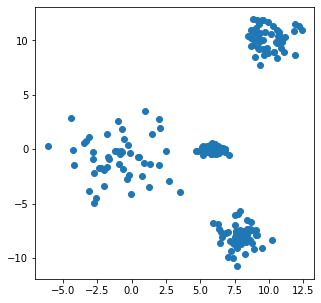

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
from numpy.random import randn
np.random.seed(0)
X = np.r_[randn(50, 2) * 2 - 1,
          randn(50, 2) + 10,
          np.c_[randn(50) + 8, randn(50) - 8],
          np.c_[randn(100) * 0.5 + 6, randn(100) * 0.2] ]
plt.scatter(X[:,0], X[:,1])

### 3.1 K-Means

O algoritmo do K-Means funciona, basicamente, da seguinte forma:

    1. Crie K centroides aleatórios no espaço de dados
    2. Repita os passos abaixo até que os centroides não se movimentem mais:
    2.1 Atribua o ponto P ao centroide mais próximo;
    2.2 Calcule a média de cada cluster;
    2.3 Reposicione os centróides nas médias

Um vídeo que mostra muito bem esse algoritmo de forma visual é este: [K-MEANS COM PYTHON PARTE 1/2 EXEMPLO VISUAL](https://www.youtube.com/watch?v=piDlrtfz58s&ab_channel=CANALSANDECO).

Agora, vamos construir o modelo K-Means e avaliá-lo utilizando o coeficiente de silhueta.

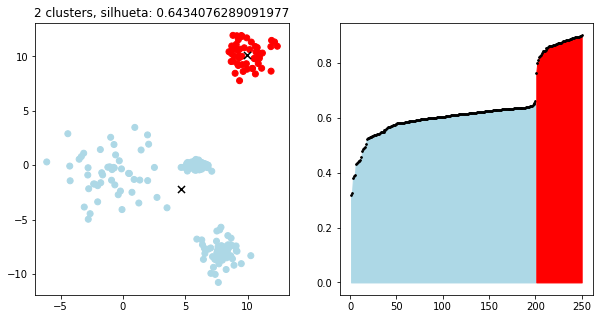

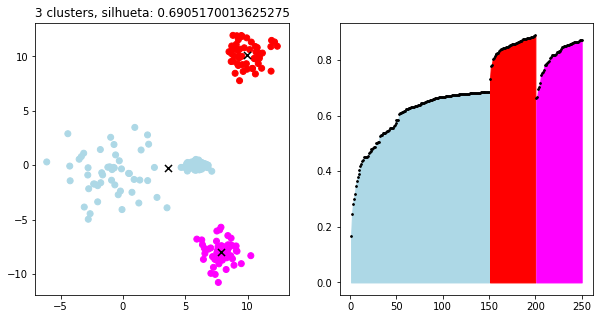

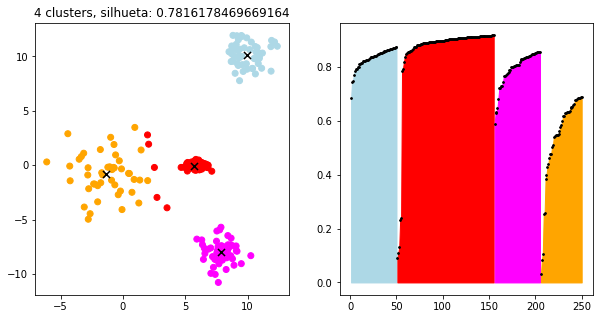

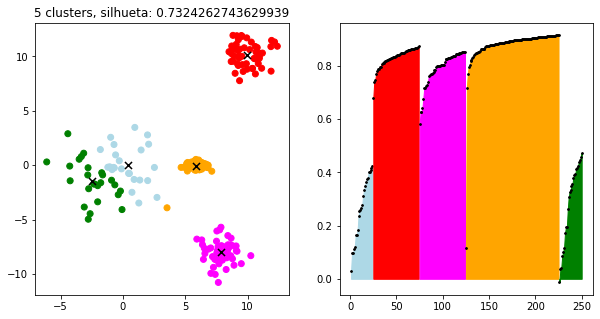

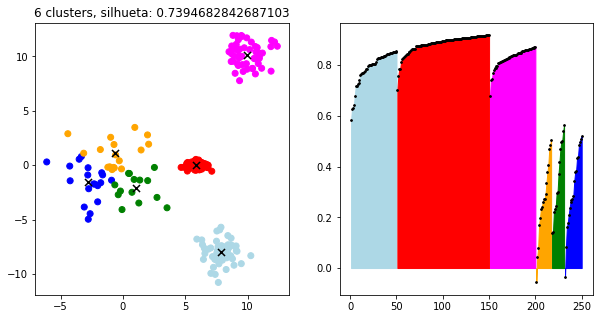

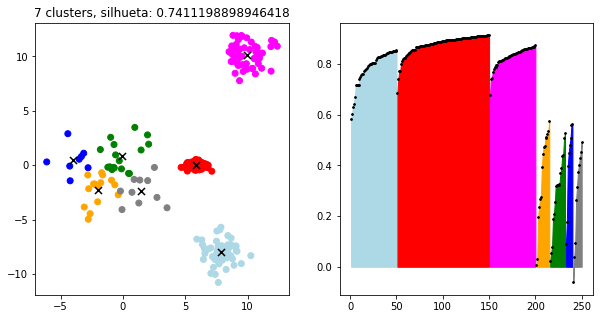

In [ ]:
plt.rcParams['figure.figsize'] = [10,5] # aqui estamos definindo as dimensões das imagens que serão plotadas
scores_kmeans = [] # esse é o vetor onde guardaremos os scores do coeficiente de silhueta

# nc será o número de clusters; nc percorrerá os valores 2, 3, 4, 5, 6 e 7
for nc in range(2, 8):
    cmap = colors.ListedColormap(clrs[0:nc])

    clst = KMeans(n_clusters=nc) # aqui estamos instanciando o k-means com nc clusters e chamando-o de clst
    y = clst.fit_predict(X) # aqui ocorre o treinamento do modelo instanciado no nosso conjunto de dados
    
    # o código abaixo está apenas plotando o resultado da clusterização e marcando os centróides (centros) dos clusters

    plt.figure() # estamos iniciando a figura que será construída
    plt.subplot(121) # em uma matriz 1x2, queremos que a próxima figura fique na posição 1
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.scatter(clst.cluster_centers_[:,0], clst.cluster_centers_[:,1], c='black', marker='x', s=50)
    plt.title('{} clusters, silhueta: {}'.format(nc, silhouette_score(X, y)))
    
    scores_kmeans.append(silhouette_score(X, y)) # estamos guardando os scores do coeficiente de silhueta no vetor scores_kmeans

    # o código abaixo está plotando as imagens referentes ao método da silhueta

    plt.subplot(122) # em uma matriz 1x2, queremos que a próxima figura fique na posição 2
    sil_v = silhouette_samples(X, y)
    xs = 1
    for j in range(0, clst.n_clusters):
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        #xmin, xmax, ymin, ymax = axis('equal')
        #ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
        xs = xs + len(sil_vc)

Os resultados do coeficiente da silhueta obtidos foram os seguintes:

In [ ]:
scores_kmeans

[0.6434076289091977,
 0.6905170013625275,
 0.7816178469669164,
 0.7324262743629939,
 0.7394682842687103,
 0.7411198898946418]

Podemos melhorar a visualização desses scores fazendo o seguinte:

In [ ]:
print('Coeficiente da silhueta para o método K-Means:')
print()
for i in range(len(scores_kmeans)):
  print(i+2, 'clusters tem o score:', scores_kmeans[i])

Coeficiente da silhueta para o método K-Means:

2 clusters tem o score: 0.6434076289091977
3 clusters tem o score: 0.6905170013625275
4 clusters tem o score: 0.7816178469669164
5 clusters tem o score: 0.7324262743629939
6 clusters tem o score: 0.7394682842687103
7 clusters tem o score: 0.7411198898946418


Note que o maior coeficiente da silhueta ocorreu quando utilizamos o método K-Means com 4 clusters. Isso nos indica que, para o K-Means, o melhor número de clusters para fazermos esse agrupamento é 4, segundo o coeficiente da silhueta.

Podemos também fazer um gráfico para entender melhor a variação do coeficiente da silhueta conforme aumentamos o número de clusters:

In [ ]:
fig = go.Figure() # instanciamos uma figura do módulo graphic objects da biblioteca plotly e chamamos de fig
# adicionamos um traço em fig; em x, passamos uma lista com os números de clústeres; em y, passamos os valores de silhueta
fig.add_trace(go.Scatter(x = [i for i in range(2, 8)], y = scores_kmeans)) 
fig.update_layout( # o comando .update_layout permite personalizar a figura já criada
    title = 'Valores de Silhueta Médios', # adicionamos o título
    xaxis_title = 'Número de Clusters', # adicionamos o rótulo do eixo x
    yaxis_title = 'Valor médio de silhueta', # adicionamos o rótulo do eixo y
    height=500, # a figura terá 500 pixels de altura
    width=1000 # a figura terá 1000 pixels de largura
)

Esse gráfico deixa claro que a qualidade da clusterização começou a aumentar à medida que aumentamos o número de clusters.

O coeficiente de silhueta atingiu seu valor máximo quando utilizamos o K-Means com 4 clusters. A partir disso, a qualidade da clusterização reduziu quando usamos 5, 6 e 7 clusters.

No gráfico, fica evidente que a quantidade ideal de clusters é 4, segundo o coeficiente da silhueta.

### 3.2 Métodos Hierárquicos

Os **métodos hierárquicos** são métodos de clusterização que dividem-se em dois grupos:

### 3.2.1 Divisivos

O método divisivo inicia assumindo que existe um único cluster, composto por todos os dados. Durante as iterações, ocorrem as divisões dos clusters, até que cada ponto seja o seu próprio cluster. Feito isso, é construído um **dendrograma** das aglomerações, que permite decidir quais e quantos são os clusters ideais.

### 3.2.2 Aglomerativos

O algoritmo desses métodos inicia assumindo que cada ponto (ou cada dado) é um cluster. A partir disso, em cada iteração, os clusters mais próximos são aglomerados e passam a formar um único cluster. Isso é feito exaustivamente até que sobre um único cluster. Assim como no caso anterior, é feita a análise de um dendograma para decidir o quais e quantos são os clusters ideais.

Os seguintes vídeos explicam todo o processo de clusterização de um método hierárquico aglomerativo, a construção e a análise de um dendograma e a implementação desse método em Python:

* Explicação sobre o método aglomerativo e os dendogramas: [Clusterização Hierárquica (Teoria) - Machine Learning 22.1](https://www.youtube.com/watch?v=fPHJIkyYi7M&ab_channel=UniversoDiscreto);

* Implementação do método aglomerativo em Python: [Clusterização Hierárquica em Python - Machine Learning 22.2](https://www.youtube.com/watch?v=I-NSH_-Vm4g&ab_channel=UniversoDiscreto).

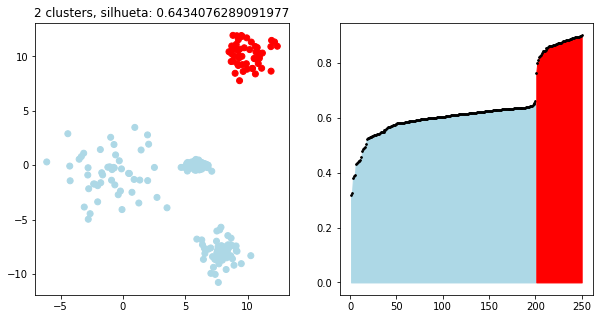

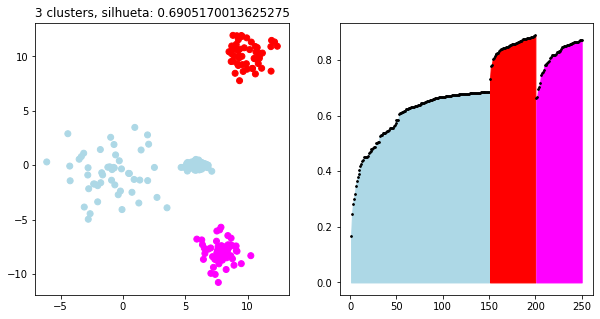

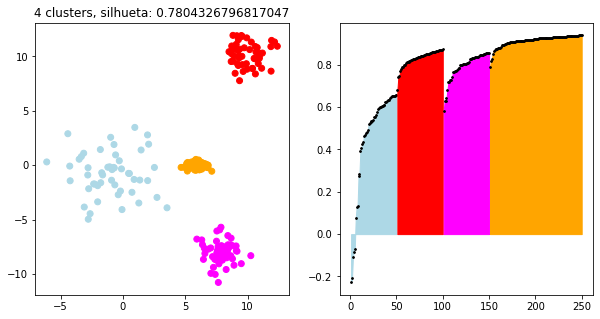

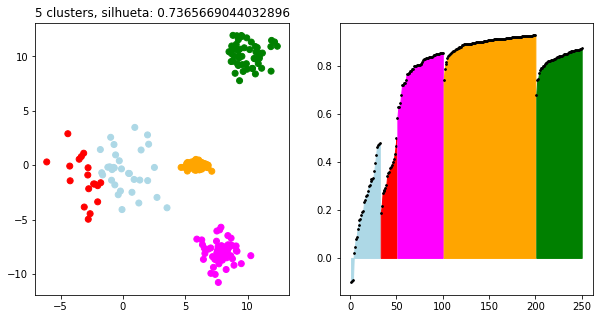

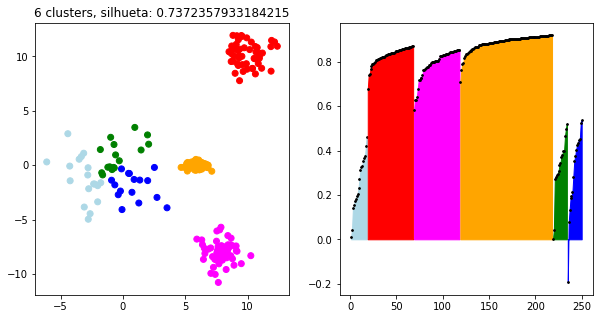

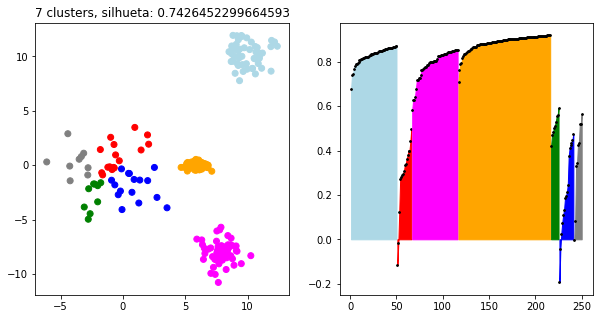

In [ ]:
plt.rcParams['figure.figsize'] = [10,5] # aqui estamos definindo as dimensões das imagens que serão plotadas
scores_aglomerativo = [] # esse é o vetor onde guardaremos os scores do coeficiente de silhueta
for nc in range(2, 8):
    cmap = colors.ListedColormap(clrs[0:nc])

    clst = AgglomerativeClustering(n_clusters=nc) # aqui estamos criando o modelo de clusterização aglomerativo
    y = clst.fit_predict(X) # aqui estamos treinando o modelo
    
    # o código abaixo está plotando o resultado de cada clusterização
    plt.figure()
    plt.subplot(121)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.title('{} clusters, silhueta: {}'.format(nc, silhouette_score(X, y)))
    
    scores_aglomerativo.append(silhouette_score(X, y)) # para usarmos posteriormente

    # o código abaixo está plotando as imagens referentes ao método da cilhueta
    plt.subplot(122)
    sil_v = silhouette_samples(X, y)
    xs = 1
    for j in range(0, clst.n_clusters):
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        xs = xs + len(sil_vc)

Os resultados do coeficiente da silhueta obtidos foram os seguintes:

In [ ]:
scores_aglomerativo

[0.6434076289091977,
 0.6905170013625275,
 0.7804326796817047,
 0.7365669044032896,
 0.7372357933184215,
 0.7426452299664593]

In [ ]:
print('Coeficiente da silhueta para o método Aglomerativo:')
print()
for i in range(len(scores_aglomerativo)):
  print(i+2, 'clusters tem o score:', scores_aglomerativo[i])

Coeficiente da silhueta para o método Aglomerativo:

2 clusters tem o score: 0.6434076289091977
3 clusters tem o score: 0.6905170013625275
4 clusters tem o score: 0.7804326796817047
5 clusters tem o score: 0.7365669044032896
6 clusters tem o score: 0.7372357933184215
7 clusters tem o score: 0.7426452299664593


Perceba que, mais uma vez, obtemos o maior coeficiente da silhueta quando fizemos o agrupamento com 4 clusters. Isso significa que, para o modelo aglomerativo, 4 também é o número ideal de clusters neste problema.

Faremos novamente o gráfico para entender melhor a variação do coeficiente da silhueta conforme aumentamos o número de clusters:


In [ ]:
fig = go.Figure() # instanciamos uma figura do módulo graphic objects da biblioteca plotly e chamamos de fig
# adicionamos um traço em fig; em x, passamos uma lista com os números de clústeres; em y, passamos os valores de silhueta
fig.add_trace(go.Scatter(x = [i for i in range(2, 8)], y = scores_aglomerativo)) 
fig.update_layout( # o comando .update_layout permite personalizar a figura já criada
    title = 'Valores de Silhueta Médios', # adicionamos o título
    xaxis_title = 'Número de Clústeres', # adicionamos o rótulo do eixo x
    yaxis_title = 'Valor médio de silhueta', # adicionamos o rótulo do eixo y
    height=500, # a figura terá 500 pixels de altura
    width=1000 # a figura terá 1000 pixels de largura
)

Mais uma vez, percebemos que, segundo o coeficiente da silhueta, a qualidade da clusterização aumenta quando aumentamos o número de clusters até 4. Quando usamos mais clusters do que isso, a qualidade diminui.

### 3.3 DBSCAN

Esse vídeo é uma boa introdução ao algoritmo DBSCAN: [Introdução ao algoritmo DBSCAN](https://www.youtube.com/watch?v=Lpd6HUtz580&ab_channel=IAExpertAcademy)

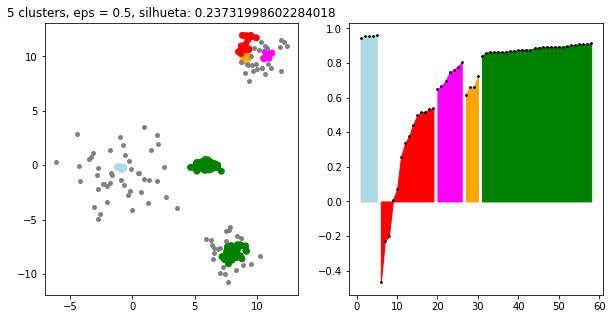

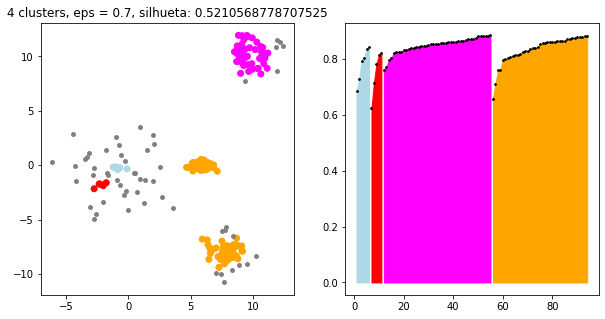

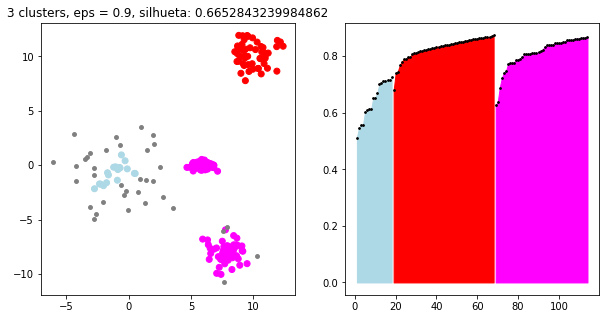

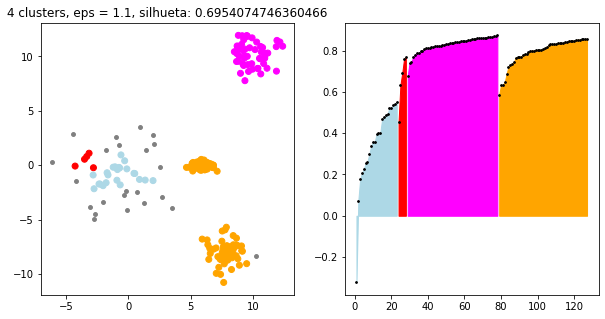

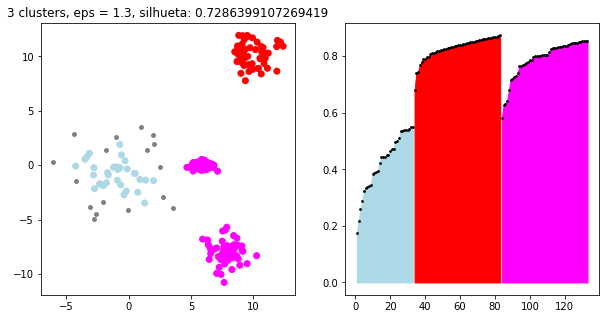

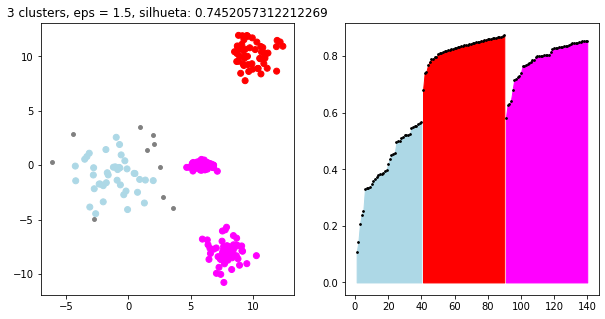

In [ ]:
plt.rcParams['figure.figsize'] = [10,5] # aqui estamos definindo as dimensões das imagens que serão plotadas
scores_dbscan = [] # esse é o vetor onde guardaremos os scores do coeficiente de silhueta
n_clusters = []
valores_eps = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5] # poderíamos também fazer: valores_eps = np.linspace(0.5, 1.5, num=7), o resultado seria similar
for eps in valores_eps:
    clst = DBSCAN(eps=eps) # aqui estamos instanciando o modelo DBSCAN e passando o parâmetro eps
    y = clst.fit_predict(X) # aqui estamos treinando o modelo no conjunto de pontos
    nc = y.max()
    n_clusters.append(nc)
    cmap = colors.ListedColormap(clrs[0:nc])

    # o código abaixo está plotando o resultado de cada clusterização
    plt.figure()
    plt.subplot(121)
    plt.scatter(X[y >= 0,0], X[y >= 0,1], c=y[y >= 0], cmap=cmap)
    plt.scatter(X[y < 0,0], X[y < 0,1], c='grey', cmap=cmap, s=15)
    plt.title('{} clusters, eps = {}, silhueta: {}'.format(nc, eps, silhouette_score(X, y)))

    scores_dbscan.append(silhouette_score(X, y)) # para usarmos posteriormente

    # o código abaixo está plotando as imagens referentes ao método da silhueta
    plt.subplot(122)
    sil_v = silhouette_samples(X, y)
    xs = 1
    for j in range(0, nc):
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        xs = xs + len(sil_vc)

Os resultados do coeficiente da silhueta obtidos foram os seguintes:

In [ ]:
print('Coeficientes da silhueta para os valores de eps do DBSCAN:')
print()
for i in range(len(valores_eps)):
  print('eps', valores_eps[i], 'com', n_clusters[i], 'clusters:', scores_dbscan[i])

Coeficientes da silhueta para os valores de eps do DBSCAN:

eps 0.5 com 5 clusters: 0.23731998602284018
eps 0.7 com 4 clusters: 0.5210568778707525
eps 0.9 com 3 clusters: 0.6652843239984862
eps 1.1 com 4 clusters: 0.6954074746360466
eps 1.3 com 3 clusters: 0.7286399107269419
eps 1.5 com 3 clusters: 0.7452057312212269


Desta vez, obtemos um resultado diferente: o melhor valor do coeficiente da silhueta ocorreu para eps = 1.5, com 3 clusters. Porém, vale notar que, nesse caso, o maior valor obtido foi 0,74 e, nos outros modelos, o melhor valor do coeficiente da silhueta foi 0,78. 

Com isso, já podemos afirmar que o método DBSCAN foi o pior? Será que conseguimos melhorar a qualidade da clusterização com esse método testando para mais valores de eps?

Dessa vez, faremos um gráfico para entender a variação do coeficiente da silhueta conforme aumentamos o valor de eps:

In [ ]:
fig = go.Figure() # instanciamos uma figura do módulo graphic objects da biblioteca plotly e chamamos de fig
# adicionamos um traço em fig; em x, passamos uma lista com os números de clústeres; em y, passamos os valores de silhueta
fig.add_trace(go.Scatter(x = valores_eps, y = scores_dbscan)) 
fig.update_layout( # o comando .update_layout permite personalizar a figura já criada
    title = 'Valores de Silhueta Médios', # adicionamos o título
    xaxis_title = 'Valores de eps', # adicionamos o rótulo do eixo x
    yaxis_title = 'Valor médio de silhueta', # adicionamos o rótulo do eixo y
    height=500, # a figura terá 500 pixels de altura
    width=1000 # a figura terá 1000 pixels de largura
)

Vale notarmos que, para os valores de eps percorridos, o número de clusters também varia. Para observarmos isso, podemos criar uma visualização no espaço tridimensional:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = valores_eps, y = n_clusters, z = scores_dbscan,
                         mode = 'markers',
                         marker = dict(color = 'red'),
                         text = [0, 1, 2]))
fig.update_layout(scene = dict(
    xaxis_title = 'Valores de eps',
    yaxis_title = 'Número de clusters',
    zaxis_title = 'Valor médio de silhueta'
))
fig.show()

Dessa forma, também fica visível que os melhores valores de silhueta para o método DBSCAN  ocorreram com 3 e 4 clusters e, além disso, os resultados foram melhores quando usamos eps perto de 1.5.

Com isso surge o questionamento: e se aumentarmos mais o valor de eps? Será que conseguiríamos resultados melhores ainda?

### 3.4 Conclusão da clusterização em 2D

Vamos, primeiramente, recordar os scores do coeficiente de silhueta que obtemos em cada um dos métodos:

In [ ]:
print('Scores K-Means:')
print(scores_kmeans)
print()
print('Scores Aglomerativo:')
print(scores_aglomerativo)
print()
print('Scores DBSCAN:')
print(scores_dbscan)

Scores K-Means:
[0.6434076289091977, 0.6905170013625275, 0.7816178469669164, 0.7324262743629939, 0.7394682842687103, 0.7411198898946418]

Scores Aglomerativo:
[0.6434076289091977, 0.6905170013625275, 0.7804326796817047, 0.7365669044032896, 0.7372357933184215, 0.7426452299664593]

Scores DBSCAN:
[0.23731998602284018, 0.5210568778707525, 0.6652843239984862, 0.6954074746360466, 0.7286399107269419, 0.7452057312212269]


Vejamos a melhor pontuação de cada modelo:

In [ ]:
print('Melhor score K-means:', max(scores_kmeans))
print('Melhor score Aglomerativo:', max(scores_aglomerativo))
print('Melhor score DBSCAN:', max(scores_dbscan))

Melhor score K-means: 0.7816178469669164
Melhor score Aglomerativo: 0.7804326796817047
Melhor score DBSCAN: 0.7452057312212269


Note que o melhor coeficiente de silhueta ocorreu no método K-Means. Como vimos na seção do K-Means, essa pontuação ocorreu quando utilizamos 4 clusters.

Com isso, os resultados **sugerem** que o melhor método é o K-Means. Porém a escolha do método depende também de fatores como a natureza do problema prático, a métrica de avaliação escolhida, o custo computacional etc.

Além disso, obviamente não exploramos toda a capacidade de cada modelo: não testamos diferentes métricas de distância, não tunamos nossos modelos para encontrar as melhores combinações de parâmetros, entre outras coisas.

Portanto, apesar de termos obtidos um score do coeficiente de silhueta melhor para o K-Means com 4 clusters, isso ainda não nos dá total certeza de que esse é o melhor método.

[//]: # (Pela natureza do dataset, o K-Means costuma performar melhor nesse tipo de dataset, uma vez que o conjunto de dados foi gerado a partir de um centroide - confirmar com o Lucas)

## 4 Clusterização em mais dimensões

Esta seção do notebook foi fortemente baseada nos materiais:

* [K-MEANS COM PYTHON PARTE 2/2](https://www.youtube.com/watch?v=yfu-HH0nyFI&ab_channel=CANALSANDECO)
* [Como definir o número de clusters para o seu KMeans](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9)

### 4.1 Explorando o dataset

Nesta seção, usaremos o K-Means para agrupar dados do dataset 'Iris', e avaliaremos as clusterizações usando o método do cotovelo e o coeficiente da silhueta.

Primeiro, vamos importar as bibliotecas necessárias:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

Agora, vamos carregar o dataset Íris e entender os seus dados e o seu contexto:

In [ ]:
iris = sns.load_dataset('iris') # carregando o dataset Iris da biblioteca Seaborn
iris.head() # plotando as 5 primeiras linhas do dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


O dataset Íris contém dados de **três tipos de flores** da espécie Íris, que são:

* Íris Setosa
* Íris Virgínica
* Íris Versicolor

Como vimos acima, as variáveis explicativas são:

* `sepal_length` (comprimento da sépala)
* `sepal_width` (largura da sépala)
* `petal_length` (comprimento da pétala)
* `petal_width` (largura da pétala)

E temos o rótulo `species`. Podemos ver as possíveis espécies assim:

In [ ]:
pd.unique(iris['species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Segue abaixo ilustrações das flores presentes no dataset:

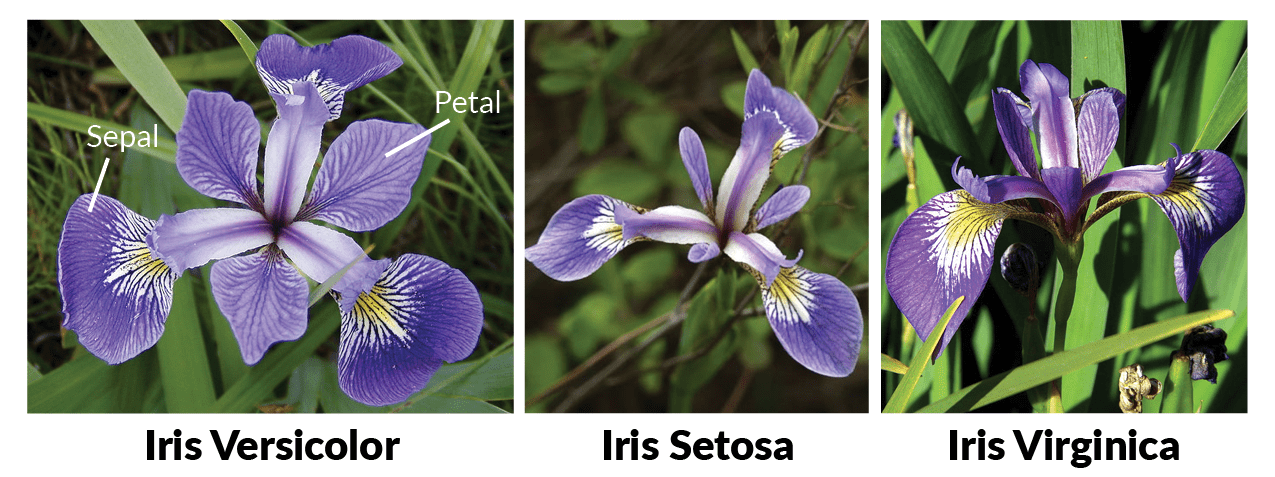

Podemos explorar algumas características estatísticas básicas do dataset, como segue abaixo. Note que isso só funciona para as colunas que possuem somente variáveis numéricas:

In [ ]:
iris.describe() # mostra contagem, média, desvio padrão, valores mínimo e máximo e quartis de cada coluna

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Podemos querer analisar quantas flores de cada espécie estão no dataset:

In [ ]:
display(iris.species.value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Note que temos 50 amostras de cada tipo de flor, ou seja, a mesma quantia de amostras de cada uma das classes. Nesse caso, dizemos que o nosso dataset está **balanceado**, caso contrário, chamaríamos o dataset de **desbalanceado**. Esses são conceitos **muito** importantes, embora não sejam trabalhados neste notebook.

Seguindo para a visualização, como os dados têm 4 atributos (`sepal_length`, `sepal_width`, `petal_length` e `petal_width`), não conseguimos representar visualmente todos esses atributos, visto que o máximo de dimensões que conseguimos representar é 3.

Com isso, uma alternativa excelente para visualizar os dados é usar a função `seaborn.pairplot`. 

Essa função posiciona todos os atributos dos dados no eixo x e no eixo y simultaneamente. Em seguida, em cada cruzamento de atributos, são feitos plots no plano de acordo com as variáveis envolvidas. Na diagonal, ficam presentes os histogramas de cada atributo.

Abaixo, usaremos essa função colorindo os plots com base nos rótulos da coluna `species`:

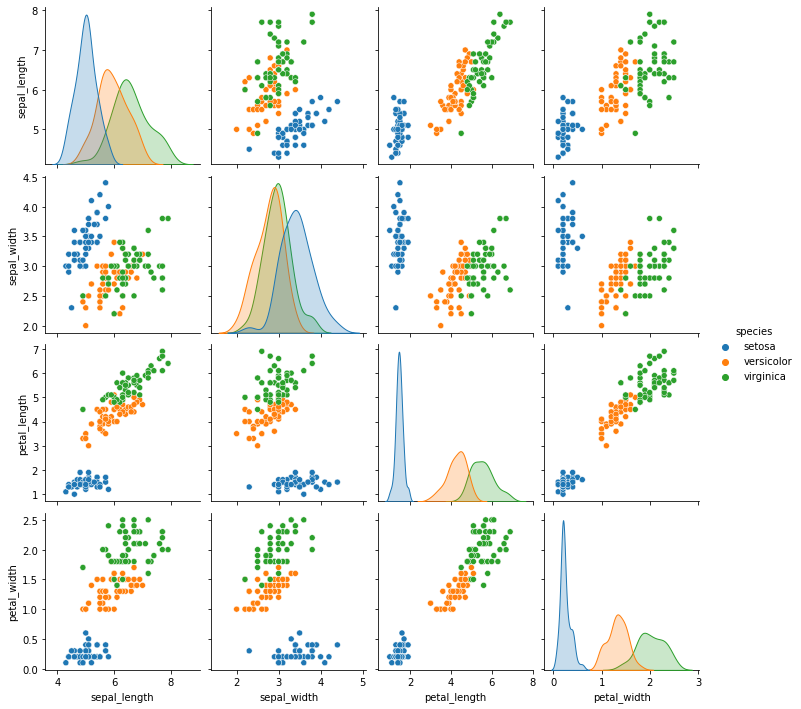

In [ ]:
sns.pairplot(iris, hue='species') # passamos o dataset e a coluna que usaremos para colorir os gráficos

Note que, até aqui, estamos trabalhando com a coluna `species`. Ou seja, já conhecemos o rótulo de cada flor.

Porém, para usar o K-Means, que é um método de aprendizado não-supervisionado, não faz sentido usarmos o rótulo de cada dado. Afinal, queremos que o modelo encontre correlações entre os dados por conta própria para agrupá-los.

Dito isso, não usaremos a coluna `species` para treinar o K-Means, usaremos essa coluna apenas para conferir, ao final da implementação, se agrupamos os dados da forma correta.

Como não usaremos a coluna `species`, podemos removê-la:

In [ ]:
df = iris.drop('species', axis=1) # criando um dataframe do pandas sem a coluna species
df.head() # plotando as 5 primeiras linhas do novo dataset, sem a coluna species

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Mesmo sem a coluna `species`, podemos visualizar os dados sem os rótulos usando a função `seaborn.pairplot`. Para isso, basta removermos o parâmetro `hue`, e passarmos apenas o dataset, como segue:

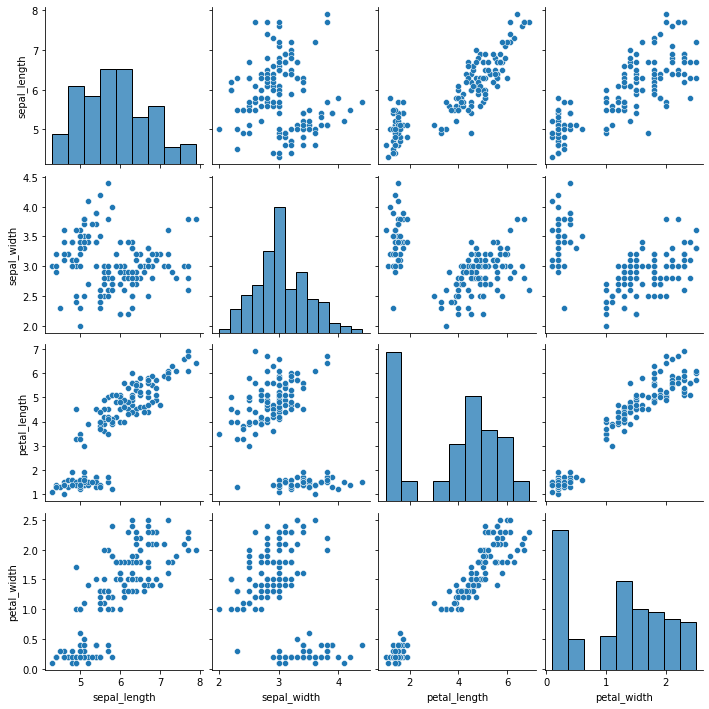

In [ ]:
sns.pairplot(df)

### 4.2 Método do cotovelo

O método do cotovelo baseia-se no cálculo da soma dos quadrados das distâncias intra-clusters, onde as distâncias intra-clusters incluem todas as distâncias de um ponto do cluster até o centroide desse cluster. Obviamente, queremos que essa distância seja minimizada, já que um cluster bom é aquele cujos elementos estão o mais próximos possível do centro.

Agora, a ideia é usarmos o método do cotovelo para encontrarmos qual é o melhor número de clusters para usarmos no K-Means.

Segue um link que explica sobre o método do cotovelo:

*   [Como definir o número de clusters para o seu KMeans](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9)

Abaixo, estamos calculando o K-Means e a soma dos quadrados intra-clusters (que chamaremos de wcss) para diferentes números de clusters. Somente com isso, já podemos plotar o gráfico do método do cotovelo e ter uma ótima noção do número ideal de clusters:

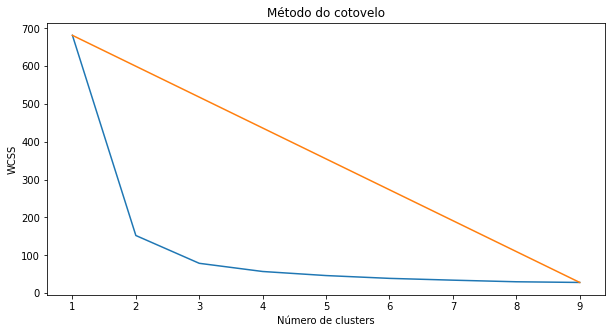

In [ ]:
from sklearn.cluster import KMeans

wcss = []
intervalo = range(1,10)
for i in intervalo:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(intervalo, wcss)
plt.plot([intervalo[0], intervalo[-1]], [wcss[0], wcss[-1]])
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Com isso, já vemos que o número ideal de clusters provavelmente é 2 ou 3.

Para saber com exatidão qual é o melhor número de clusters, precisamos calcular as distâncias dos vértices do gráfico até o segmento de reta que passa pelos pontos inicial e final, que está desenhado em laranja.

O ponto com a maior distância até o segmento de reta laranja corresponderá ao melhor número de clusters.

Podemos calcular essas distâncias da seguinte forma:



$$distance(P_0, P_1, (x,y)) = \dfrac{|(y_1 - y_0)x - (x_1 - x_0)y + x_1y_0 - y_1x_0|}{\sqrt{(y_1 - y_0)^2 + (x_1 - x_0)^2}} $$

Onde:

* $P_0 = (x_0, y_0)$ é o ponto inicial do gráfico;
* $P_1 = (x_1, y_1)$ é o ponto final do gráfico;
* $(x, y)$ é o ponto cuja distância até a reta será calculada.

Podemos fazer esse cálculo com a função abaixo, que recebe os pontos envolvidos e retorna a distância do ponto à reta:

In [ ]:
def distancia(x0, y0, x1, y1, x, y):
    numerador = abs((y1 - y0)*x - (x1 - x0)*y + x1*y0 - y1*x0)
    denominador = ( (y1 - y0)**2 + (x1 - x0)**2 )**(1/2)
    distancia = numerador / denominador
    return distancia

Agora, vamos criar outra função que calcula a distância de todos os pontos até a reta e retorna o ponto cuja distância é a maior:

In [ ]:
def elbow(k, wcss):
    distancias = []
    x0 = k[0]
    y0 = wcss[0]
    x1 = k[-1]
    y1 = wcss[-1]

    for i in k:
        x = k[i-1]
        y = wcss[i-1]
        distancias.append(distancia(x0, y0, x1, y1, x, y))
    n_clusters = distancias.index(max(distancias)) + 1
    return n_clusters, distancias

Feito isso, podemos usar a função `elbow` para saber qual é o número ideal de clusters, segundo o Método do Cotovelo:

In [ ]:
elbow(intervalo, wcss)

(2,
 [9.355718321145279e-16,
  5.47974272330034,
  5.380030547498678,
  4.644951782066948,
  3.776773293336515,
  2.8678812047953963,
  1.9260168856579178,
  0.9779833831980429,
  9.355718321145279e-16])

Note que o ponto correspondente a 2 clusters teve uma distância de 6.27 até a reta. Já o ponto que corresponde a 3 clusters teve uma distância de 6.28.

A diferença é mínima, mas o Método do Cotovelo nos diz que o número ideal de clusters é 3.

### 4.3 Método da silhueta

O coeficiente da silhueta é um método de avaliação melhor do que o método do cotovelo. Ele leva em consideração duas coisas:

* **Coesão:** o quanto cada ponto está próximo dos demais pontos do próprio cluster;

* **Separação:** o quanto cada ponto está distante dos pontos dos outros clusters.

Obviamente, queremos que cada ponto $i$ esteja próximo dos demais pontos do seu próprio cluster e distante dos pontos dos demais clusters.

Uma forma de descrevermos isso matematicamente é a seguinte:

* $a(i)$: distância média do ponto $i$ com os demais pontos do seu cluster;
* $b(i)$: distância média do ponto $i$ com os pontos do cluster mais próximo de seu cluster;
* $s(i)$: coeficiente de silhueta para o ponto $i$

$$s(i) = \dfrac{b(i) - a(i)}{max(b(i), a(i))}$$

Isso é feito para todos os pontos envolvidos e a pontuação final do método da silhueta é dada pela média de todos os coeficientes. Ou seja, se temos $n$ pontos, a pontuação final será:

$$pontuacao\_final = \sum_{k=1}^{n}{s(k)}$$

Dito isso, vamos calcular a média de silhueta para diferentes números de clusters usando o K-Means:

In [ ]:
scores_kmeans_2 = [] # esse é o vetor onde guardaremos os scores do coeficiente de silhueta

# nc será o número de clusters; nc percorrerá os valores 2, 3, 4, 5, 6 e 7
for nc in range(2, 8):
    modelo = KMeans(n_clusters=nc) # aqui estamos instanciando o k-means com nc clusters e chamando-o de clst
    pred = modelo.fit_predict(df) # aqui ocorre o treinamento do modelo instanciado no nosso conjunto de dados
    scores_kmeans_2.append(silhouette_score(df, pred)) # estamos guardando os scores do coeficiente de silhueta no vetor scores_kmeans

Dessa vez, não temos imagens dos clusters porque estamos trabalhando com 4 dimensões. Porém, podemos analisar os valores de silhueta normalmente:

In [ ]:
print('Coeficiente da silhueta para o K-Means:')
print()
for i in range(len(scores_kmeans_2)):
  print(i+2, 'clusters tem o score:', scores_kmeans_2[i])

Coeficiente da silhueta para o K-Means:

2 clusters tem o score: 0.47934668013399045
3 clusters tem o score: 0.5525706707781534
4 clusters tem o score: 0.6432836208397226
5 clusters tem o score: 0.6880971777367512
6 clusters tem o score: 0.7182871915576353
7 clusters tem o score: 0.705294278764531


Veja que obtemos uma pontuação significativamente maior quando usamos 2 clusters. 

Apesar de não conseguirmos visualizar os agrupamentos em todas as dimensões, podemos usar o `seaborn.pairplot` novamente, usando os rótulos conforme os agrupamentos feitos pelo K-Means.

Primeiro, vamos treinar novamente um modelo K-Means com 2 clusters:

In [ ]:
kmeans = KMeans(n_clusters=2) # aqui estamos instanciando o k-means com nc clusters e chamando-o de clst
y = kmeans.fit_predict(df)
kmeans.labels_

In [ ]:
df_agrupado = df
df_agrupado['labels_kmeans'] = kmeans.labels_
df_agrupado.head()

,sepal_length,sepal_width,petal_length,petal_width,labels_kmeans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


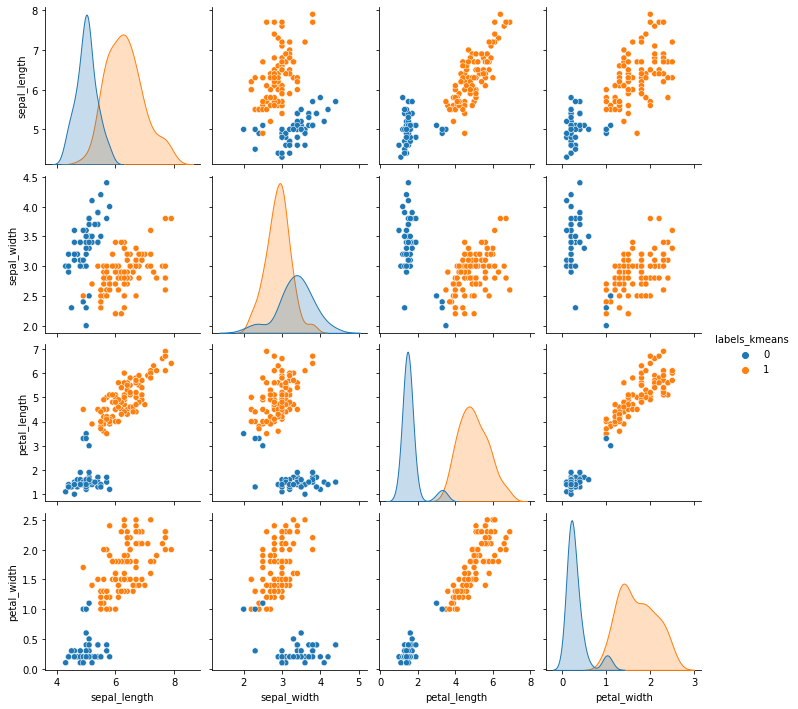

In [ ]:
sns.pairplot(df_agrupado, hue='labels_kmeans')

Perceba que, com base nos atributos das medidas das pétalas e sépalas das flores, foram feitos dois clusters que, visualmente, fazem bastante sentido. Porém, sabemos que existem 3 classes para as flores, não 2.

Isso é relevante para frisarmos que **os métodos de clusterização não necessariamente separam de acordo com as classes que temos**, mas sim de acordo com a proximidade dos pontos segundo alguma **métrica de distância**.

### 4.4 Método do cotovelo x Método da silhueta

Apesar de ambos os métodos serem úteis para definir o número ideal de clusters, temos - basicamente - a seguinte diferença entre eles:

* **Método do cotovelo:** baseia-se no cálculo da soma dos quadrados das distâncias **intra-clusters** (wcss), onde queremos minimizar essa soma. Explicando de outro modo, esse método permite visualizarmos como a **variância** dos dados diminui à medida que aumentamos o número de clusters; quando a variância para de reduzir significativamente, temos o "cotovelo" no gráfico, e ali está o número ideal de clusters.

* **Método da silhueta:** baseia-se na coesão e na separação, como já vimos. Ou, em outras palavras, baseia-se nas distâncias **intra-clusters** (queremos minimizá-las) e nas distâncias **inter-clusters** (queremos maximizá-las).

Por essa razão, o método da silhueta é melhor: ele leva em conta o agrupamento dentro de cada cluster e a separação dos clusters; já o método do cotovelo não leva em conta a separação dos clusters.

Geralmente, o método do cotovelo é usado apenas para ter uma noção inicial, e o da silhueta para ter uma análise um pouco melhor.

### 4.4 Explorando diferentes métricas de distância

Em todo o notebook até agora, utilizamos **distância euclidiana** nos modelos de clusterização. Porém, existem outras métricas de distância que podem ser usadas e interferem nos resultados dos modelos, tais como a Manhattan, L1, L2 etc.

Por exemplo, no método DBSCAN, isso é definido no parâmetro "metric". Pode-se ver mais na documentação: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

### 4.5 Extra: plot para analisar a clusterização

Feita a clusterização, uma dica é plotar (se possível) os dados de acordo com os rótulos dados pelo modelo de clusterização.

Abaixo, selecionamos as variáveis "sepal_length", "sepal_width" e "petal_length" para fazer esse plot.

Os rótulos que estão sendo utilizados são aqueles provenientes da clusterização pelo modelo K-means. Assim, podemos ter uma breve noção da qualidade da clusterização.

In [ ]:
import plotly
import plotly.graph_objects as go

labels = kmeans.labels_

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['sepal_length'], y = df['sepal_width'], z = df['petal_length'],
                         mode = 'markers',
                         marker = dict(color = kmeans.labels_.astype(np.float)),
                         text = labels))
fig.update_layout(scene = dict(
    xaxis_title = 'sepal_length',
    yaxis_title = 'sepal_width',
    zaxis_title = 'petal_length'
))
fig.show()